# Evalaution Literature review results

In [1]:
questions = ['What is the significance of modulating miRNA expression in counteracting muscle loss and weakness during catabolic conditions? ',
'What common pattern of transcriptional changes is involved in muscle atrophy? ',
'How does the timing of miRNA expression changes compare to the transcriptional control of atrophy-related genes (atrogenes) after denervation? ',
'Which specific microRNAs were identified as the most induced in denervated muscles?',
'Is the miRNA signature common across different catabolic conditions (fasting, denervation, diabetes, cancer cachexia), or is it unique to each condition? ',
'Are miRNA-206 and miRNA-21 sufficient and required for the atrophy program? ',
'What downstream targets of miRNA-206 and miRNA-21 were identified in the denervation atrophy model?',
'What is the effect of over-expression of miRNA-206 or miRNA-21 on muscle atrophy?',
'What clinical manifestations characterized patients identified in Subtype 1 (the cachexia subtype) compared to Subtype 2 based on RNAome clustering?',
'Which major biological processes/pathways contributed to the differential expression seen in the cachectic Subtype 1 of human skeletal muscle? ',
'How did the differential expression (DE) of non-coding RNAs differ between male and female patients based on the molecular subtype classification in cancer cachexia? ',
'What was the key observation regarding the involvement of canonical atrophy genes (like ubiquitin ligases) in the human cachexia subtypes compared to expectations from rodent models?',
'Why is there a necessity for companion diagnostics of senescence, such as novel biomarkers? ',
'What was the primary finding regarding the specificity of miRNA and mRNA expression changes during senescence across various human primary cell types induced in vitro? ',
'How does microRNA expression respond dynamically to high-fat diet (HFD)-induced senescent cell burden in fat tissue, and what is the consequence of p21 senescent-cell clearance? ',
'Which specific miRNA families are highlighted as valuable potential biomarkers due to their conserved regulation across different experimental systems and association with senescence markers?',
'What is the correlation between miR-146a-5p and p16 expression in aged tissues, and why is this significant for systemic senescence burden? ',
'When analyzing microRNA-mRNA co-sequencing data, which abundant miRNA was consistently found to be significantly anticorrelated with its predicted targets, suggesting a causal repression? ',
'What structural rearrangement of the N domain of human Argonaute 2 (HsAGO2) enables the slicing-competent conformation when bound to a fully paired target RNA?',
'What is the role of the central loop (residues 709–714) in the Argonaute 2 (AGO2) PIWI domain during RNA slicing? ',]



In [2]:

import pandas as pd
import numpy as np


import os


import json

import time

In [3]:
pwd

'/home/karen/Documents/GitHub/MirKatAI/evaluation'

In [4]:
results_path = 'data/Questions_literature_result.csv'
results_df = pd.read_csv(results_path)
results_df.head()

,Expected reference,Question,MK-Expected cite,MK-Number of references,MK-Number of words,CG-Expected cite,CG-Number of references,CG-Number of words
0,Soares2014InvolvementConditions,What is the significance of modulating miRNA e...,Yes,8,134,NaN,0,383
1,Soares2014InvolvementConditions,What common pattern of transcriptional changes...,No,7,236,NaN,0,418
2,Soares2014InvolvementConditions,How does the timing of miRNA expression change...,Yes,13,158,NaN,0,332
3,Soares2014InvolvementConditions,Which specific microRNAs were identified as th...,Yes,5,135,Yes,3,342
4,Soares2014InvolvementConditions,Is the miRNA signature common across different...,Yes,14,192,NaN,0,419


In [6]:
# if the column starts with 'MK-' is miRKatAI response. If it starts with 'CG-' is ChatGPT response.

# get mean and std for each model on Number of references.

nReferences = results_df[['Question', 'MK-Number of references', 'CG-Number of references']]
nReferences['MK-Number of references'] = pd.to_numeric(nReferences['MK-Number of references'], errors='coerce')
nReferences['CG-Number of references'] = pd.to_numeric(nReferences['CG-Number of references'], errors='coerce')
nReferences_melted = nReferences.melt(id_vars=['Question'], value_vars=['MK-Number of references', 'CG-Number of references'], var_name='Model', value_name='Number of references')
nReferences_melted['Model'] = nReferences_melted['Model'].str.replace('MK-', 'MirKatAI-')
nReferences_melted['Model'] = nReferences_melted['Model'].str.replace('CG-', 'ChatGPT-') 
nReferences_summary = nReferences_melted.groupby('Model')['Number of references'].agg(['mean', 'std']).reset_index()
nReferences_summary

/tmp/ipykernel_345425/3909037963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nReferences['MK-Number of references'] = pd.to_numeric(nReferences['MK-Number of references'], errors='coerce')
/tmp/ipykernel_345425/3909037963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nReferences['CG-Number of references'] = pd.to_numeric(nReferences['CG-Number of references'], errors='coerce')


,Model,mean,std
0,ChatGPT-Number of references,0.35,1.089423
1,MirKatAI-Number of references,7.95,3.284333


In [7]:
# get average Number of words
nWords = results_df[['Question', 'MK-Number of words', 'CG-Number of words']]
nWords['MK-Number of words'] = pd.to_numeric(nWords['MK-Number of words'], errors='coerce')
nWords['CG-Number of words'] = pd.to_numeric(nWords['CG-Number of words'], errors='coerce')
nWords_melted = nWords.melt(id_vars=['Question'], value_vars=['MK-Number of words', 'CG-Number of words'], var_name='Model', value_name='Number of words')
nWords_melted['Model'] = nWords_melted['Model'].str.replace('MK-', 'MirKatAI-')
nWords_melted['Model'] = nWords_melted['Model'].str.replace('CG-', 'ChatGPT-') 
nWords_summary = nWords_melted.groupby('Model')['Number of words'].agg(['mean', 'std']).reset_index()
nWords_summary  

/tmp/ipykernel_345425/1227349382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nWords['MK-Number of words'] = pd.to_numeric(nWords['MK-Number of words'], errors='coerce')
/tmp/ipykernel_345425/1227349382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nWords['CG-Number of words'] = pd.to_numeric(nWords['CG-Number of words'], errors='coerce')


,Model,mean,std
0,ChatGPT-Number of words,712.8,264.371469
1,MirKatAI-Number of words,220.5,84.435276


/tmp/ipykernel_345425/2931393085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/home/karen/Documents/GitHub/MirKatAI/.venv/lib/python3.11/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


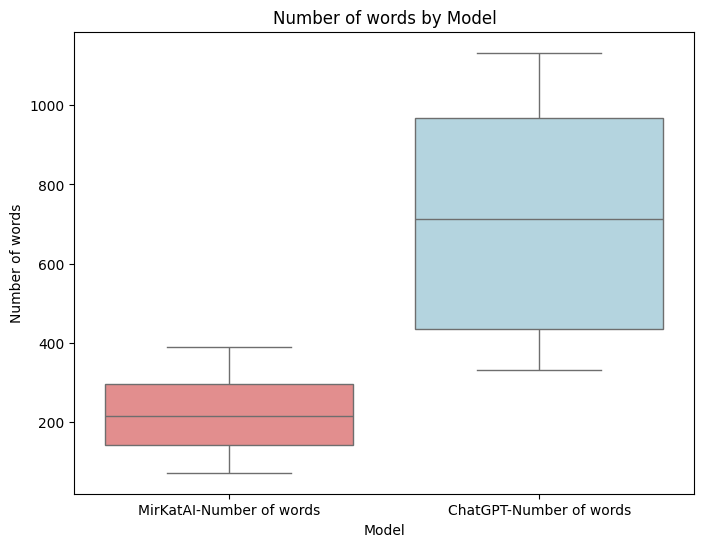

In [13]:
# make a boxplot of the numbber of words for each model. Paint miRKatAI as a pinkish red and ChatGPT as a light blue. Add the significance stars if the p-value is less than 0.05.
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Model',
    y='Number of words',
    data=nWords_melted,
    palette={
        'MirKatAI-Number of words': 'lightcoral',
        'ChatGPT-Number of words': 'lightblue'
    }
)
plt.title('Number of words by Model')

# Add significance stars
mirkatai_words = nWords_melted[nWords_melted['Model'] == 'MirKatAI-']['Number of words']
chatgpt_words = nWords_melted[nWords_melted['Model'] == 'ChatGPT-']['Number of words']
t_stat, p_val = ttest_ind(mirkatai_words, chatgpt_words, nan_policy='omit')
if p_val < 0.05:
    plt.text(0.5, 0.95, '*', ha='center', va='center', transform=plt.gca().transAxes, fontsize=24)

plt.savefig('results/number_of_words_boxplot.svg')
plt.show()

In [20]:
# rename Mirkat-Number of words and ChatGPT-Number of words
nWords_melted['Model'] = nWords_melted['Model'].replace({
    'MirKatAI-Number of words': 'MirKatAI',
    'ChatGPT-Number of words': 'ChatGPT'
})

/tmp/ipykernel_345425/1139509866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


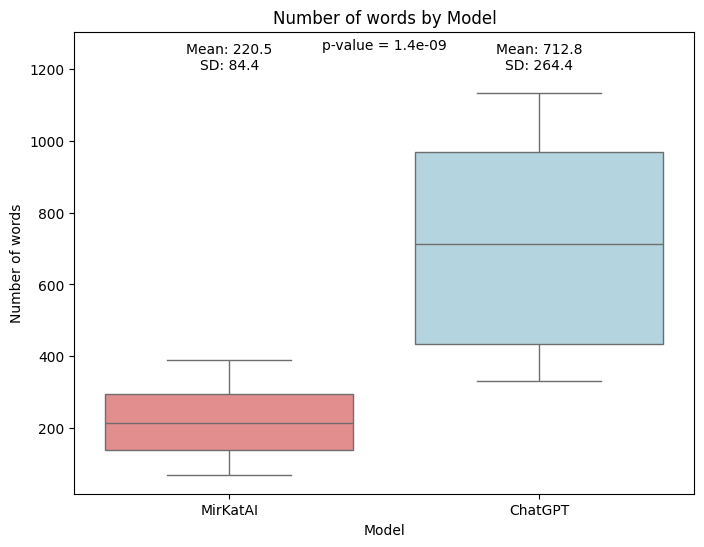

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x='Model',
    y='Number of words',
    data=nWords_melted,
    palette={
        'MirKatAI': 'lightcoral',
        'ChatGPT': 'lightblue'
    }
)

plt.title('Number of words by Model')

# Extract values correctly
mirkatai = nWords_melted[nWords_melted['Model'] == 'MirKatAI']['Number of words']
chatgpt = nWords_melted[nWords_melted['Model'] == 'ChatGPT']['Number of words']

# Compute stats
m_mean, m_std = mirkatai.mean(), mirkatai.std()
c_mean, c_std = chatgpt.mean(), chatgpt.std()

# T-test
t_stat, p_val = ttest_ind(mirkatai, chatgpt, nan_policy='omit')

# Annotation positions
y_max = nWords_melted['Number of words'].max()
offset = (y_max * 0.05)  # space above the boxes

# Add text labels
ax.text(0, y_max + offset, f"Mean: {m_mean:.1f}\nSD: {m_std:.1f}", 
        ha='center', va='bottom', fontsize=10)

ax.text(1, y_max + offset, f"Mean: {c_mean:.1f}\nSD: {c_std:.1f}", 
        ha='center', va='bottom', fontsize=10)

ax.text(0.5, y_max + offset * 2,
        f"p-value = {p_val:.3g}",
        ha='center', va='bottom', fontsize=10)

plt.ylim(top=y_max + offset * 3)  # extend y-axis to avoid clipping
plt.savefig('results/number_of_words_boxplot.svg')
plt.show()


In [22]:
results_df.columns

Index(['Expected reference', 'Question', 'MK-Expected cite',
       'MK-Number of references', 'MK-Number of words', 'CG-Expected cite',
       'CG-Number of references', 'CG-Number of words'],
      dtype='object')

In [24]:
len(results_df)

20

In [23]:
# count how many Yes in 'MK-Expected cite' and 'CG-Expected cite'
mk_yes_count = results_df['MK-Expected cite'].str.lower().value_counts().get('yes', 0)
cg_yes_count = results_df['CG-Expected cite'].str.lower().value_counts().get('yes', 0)
mk_yes_count, cg_yes_count

(np.int64(16), np.int64(2))

In [26]:
# count how many 0 in 'MK-Number of references' and 'CG-Number of references'
mk_zero_count = (results_df['MK-Number of references'] == 0).sum()
cg_zero_count = (results_df['CG-Number of references'] == 0).sum()
mk_zero_count, cg_zero_count

(np.int64(0), np.int64(18))

In [27]:
# average number of references for each model
results_df['MK-Number of references'] = pd.to_numeric(results_df['MK-Number of references'], errors='coerce')
results_df['CG-Number of references'] = pd.to_numeric(results_df['CG-Number of references'], errors='coerce')
mk_avg_references = results_df['MK-Number of references'].mean()
cg_avg_references = results_df['CG-Number of references'].mean()
mk_avg_references, cg_avg_references

(np.float64(7.95), np.float64(0.35))